In [208]:
import pandas as pd
import matplotlib.pyplot as plt

## Load dataset

In [209]:
df = pd.read_csv("survey_results_public.csv")
df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


## Data Preprocessing

* #### Select useful column and rename "ConvertedCompYearly" to "Salary"

In [210]:
df = df[["Country", "EdLevel", "YearsCodePro", "Employment", "ConvertedCompYearly"]]
df = df.rename({"ConvertedCompYearly": "Salary"}, axis=1)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,NaN,NaN,NaN,NaN,NaN
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,"Employed, full-time",285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,"Employed, full-time",250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,"Employed, full-time",156000.0
4,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,"Employed, full-time;Independent contractor, fr...",23456.0


In [211]:
df = df[df["Salary"].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,"Employed, full-time",285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,"Employed, full-time",250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,"Employed, full-time",156000.0
4,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,"Employed, full-time;Independent contractor, fr...",23456.0
5,United Kingdom of Great Britain and Northern I...,Some college/university study without earning ...,21,"Employed, full-time",96828.0


In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48019 entries, 1 to 89171
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       48019 non-null  object 
 1   EdLevel       48019 non-null  object 
 2   YearsCodePro  47825 non-null  object 
 3   Employment    48007 non-null  object 
 4   Salary        48019 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.2+ MB


* #### Drop null value

In [213]:
df = df.dropna()
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [214]:
df[df["Employment"] == "Employed, full-time"]
df = df.drop("Employment", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47813 entries, 1 to 89171
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       47813 non-null  object 
 1   EdLevel       47813 non-null  object 
 2   YearsCodePro  47813 non-null  object 
 3   Salary        47813 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.8+ MB


In [215]:
df['Country'].value_counts()

Country
United States of America                                11846
Germany                                                  3947
United Kingdom of Great Britain and Northern Ireland     3521
Canada                                                   2095
India                                                    1849
                                                        ...  
Guinea-Bissau                                               1
Mauritania                                                  1
Botswana                                                    1
Guyana                                                      1
Antigua and Barbuda                                         1
Name: count, Length: 171, dtype: int64

* #### Function to shorten the categories 

In [216]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [217]:
country_map = shorten_categories(df.Country.value_counts(), 500)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

Country
Other                                                   12772
United States of America                                11846
Germany                                                  3947
United Kingdom of Great Britain and Northern Ireland     3521
Canada                                                   2095
India                                                    1849
France                                                   1793
Netherlands                                              1359
Poland                                                   1265
Brazil                                                   1249
Australia                                                1206
Spain                                                    1142
Sweden                                                   1055
Italy                                                    1009
Switzerland                                               659
Austria                                                   531


* #### Create Box plot

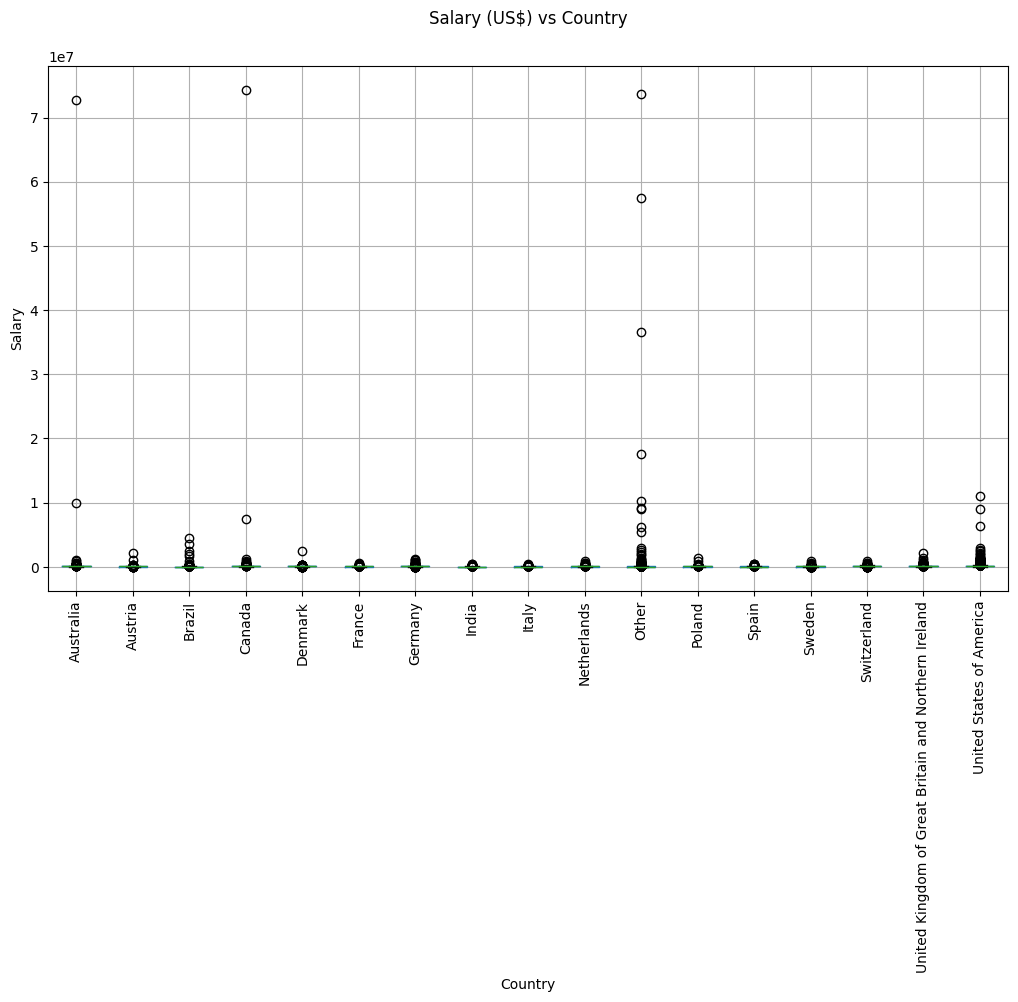

In [218]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) vs Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

Filter the outlier out of boxplot

In [219]:
df = df[df["Salary"] <= 250000]
df = df[df["Salary"] >= 10000]
df = df[df['Country'] != 'Other']

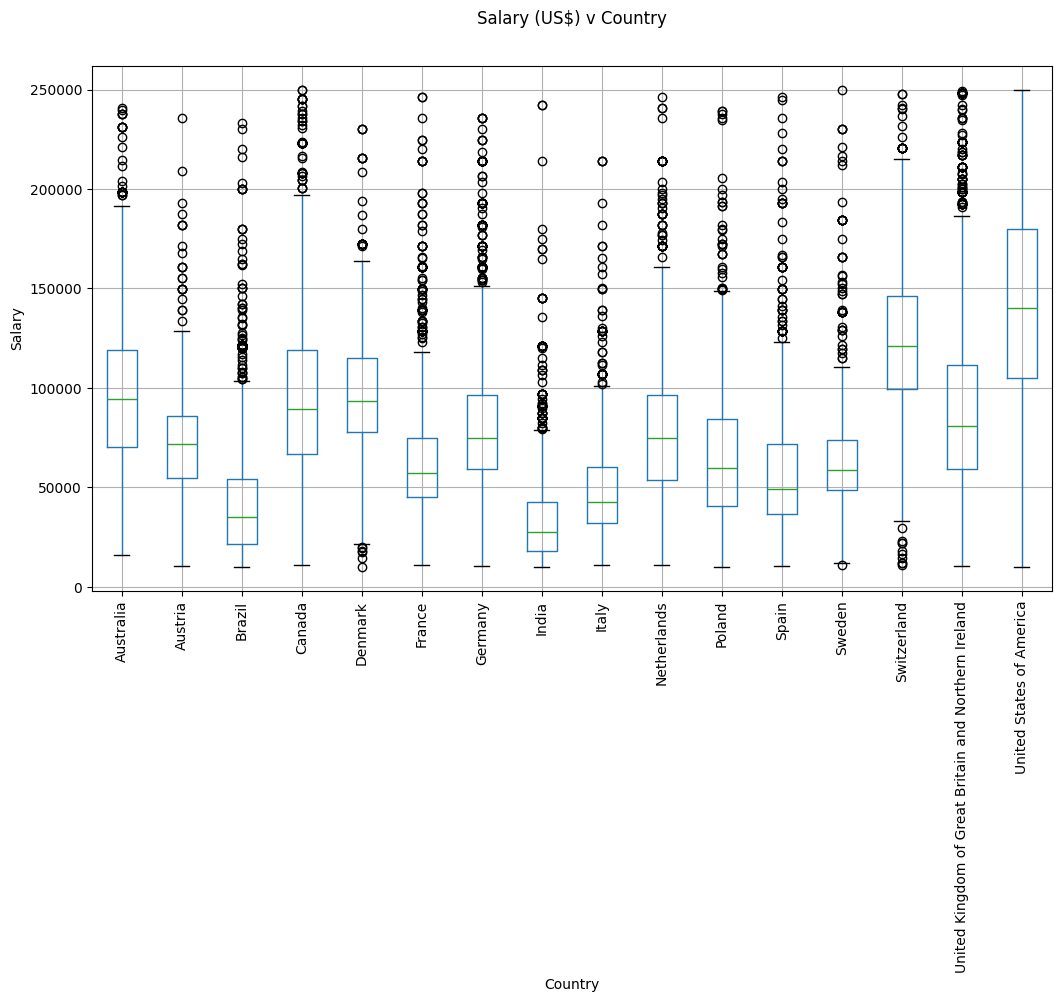

In [220]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [221]:
df["YearsCodePro"].unique()

array(['23', '7', '21', '3', '9', 'Less than 1 year', '10', '2', '6',
       '14', '5', '15', '19', '13', '16', '28', '30', '24', '40', '4',
       '25', '12', '20', '11', '8', '18', '50', '27', '17', '43', '26',
       '38', '33', '29', '22', '1', '31', '37', '42',
       'More than 50 years', '36', '39', '35', '34', '41', '32', '44',
       '48', '45', '46', '47', '49'], dtype=object)

* #### Clean experience

In [222]:
def clean_experience(x):
    if x ==  'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)

In [223]:
df["EdLevel"].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Something else', 'Primary/elementary school'], dtype=object)

* #### Clean Education level

In [224]:
def clean_education(x):
    if "Bachelor’s degree" in x:
        return "Bachelor’s degree"
    if "Master’s degree" in x:
        return "Master’s degree"
    if "Professional degree" in x or "Other doctoral" in x:
        return "Post grad"
    return "Less than a Bachelors"

df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [225]:
df["EdLevel"].unique()

array(['Bachelor’s degree', 'Less than a Bachelors', 'Master’s degree',
       'Post grad'], dtype=object)

* #### Create label encoder

In [226]:
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])
df["EdLevel"].unique()

array([0, 1, 2, 3])

In [227]:
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
df["Country"].unique()

array([15, 14,  0,  9,  6, 12,  5, 11,  2,  8,  3, 13,  7,  1, 10,  4])

## Build the Model

* #### Data splitting

In [228]:
X = df.drop("Salary", axis=1)
y = df["Salary"]

### Linear Regression

In [229]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X, y.values)

LinearRegression()

In [230]:
y_pred = linear_reg.predict(X)

* #### Evaluate Model Performance

In [231]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y, y_pred))

In [232]:
f'Linear Regression MSE : {error:.2f}'

'Linear Regression MSE : 46881.83'

### Decision Tree

In [233]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X, y.values)

DecisionTreeRegressor(random_state=0)

In [234]:
y_pred = dec_tree_reg.predict(X)

In [235]:
error = np.sqrt(mean_squared_error(y, y_pred))
f'Decision Tree MSE : {error:.2f}'

'Decision Tree MSE : 35564.44'

### Random Forest

In [236]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(X, y.values)

RandomForestRegressor(random_state=0)

In [237]:
y_pred = random_forest_reg.predict(X)

In [238]:
error = np.sqrt(mean_squared_error(y, y_pred))
f'Random Forest MSE : {error:.2f}'

'Random Forest MSE : 35625.00'

#### Create Grid Search CV

In [239]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X, y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [240]:
regressor = gs.best_estimator_

regressor.fit(X, y.values)
y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.2f}".format(error))

$36,921.40


In [241]:
X

,Country,EdLevel,YearsCodePro
2,15,0,23.0
3,15,0,7.0
5,14,1,21.0
6,15,1,3.0
7,15,0,3.0
...,...,...,...
89156,15,0,8.0
89158,12,0,8.0
89162,2,2,24.0
89167,7,0,2.0


In [242]:
# country, edlevel, yearscode
X = np.array([['United States of America', 'Master’s degree', 15]])
X

array([['United States of America', 'Master’s degree', '15']],
      dtype='<U24')

In [243]:
X[:, 0] = le_country.transform(X[:,0])
X[:, 1] = le_education.transform(X[:,1])
X = X.astype(float)
X

array([[15.,  2., 15.]])

In [244]:
y_pred = regressor.predict(X)
y_pred

C:\Users\CHANG\OneDrive\Desktop\AI\Machine_Learning\ML_Web_App\env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([169660.54035088])

### Store Data inside our directory

In [245]:
import pickle

In [246]:
data = {"model": regressor, "le_country": le_country, "le_education": le_education}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [247]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]

In [248]:
y_pred = regressor_loaded.predict(X)
y_pred

C:\Users\CHANG\OneDrive\Desktop\AI\Machine_Learning\ML_Web_App\env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([169660.54035088])